In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
database = pd.read_csv('/Users/felipe.manso/Desktop/Arquivos_análises/dados_consumo_streaming.csv')

In [17]:
database.head()

,id_usuario,data,tempo_assinatura,categoria_conteudo,tempo_visualizacao,avaliacao_conteudo,device,pausou_reproduzir
0,1,2024-09-27 12:28:48.119520,10,Filmes,158,4,Smart TV,Não
1,2,2024-07-27 12:28:48.119520,12,Shows,71,4,Computador,Sim
2,3,2024-07-19 12:28:48.119520,10,Séries,132,2,Smartphone,Não
3,4,2024-08-16 12:28:48.119520,2,Séries,71,3,Smartphone,Não
4,5,2024-09-19 12:28:48.119520,19,Séries,109,2,Smart TV,Sim


In [19]:
#removendo as variáveis categóricas
variaveis_numericas = database.select_dtypes(include=['number'])
correlacao = variaveis_numericas.corr(method='spearman')
print(correlacao)

                    id_usuario  tempo_assinatura  tempo_visualizacao  \
id_usuario            1.000000         -0.020628           -0.019615   
tempo_assinatura     -0.020628          1.000000            0.034936   
tempo_visualizacao   -0.019615          0.034936            1.000000   
avaliacao_conteudo    0.001868         -0.001801           -0.012182   

                    avaliacao_conteudo  
id_usuario                    0.001868  
tempo_assinatura             -0.001801  
tempo_visualizacao           -0.012182  
avaliacao_conteudo            1.000000  


In [40]:
range_data = database['data'].drop_duplicates
max(database['data'])


'2024-10-16 12:28:48.119520'

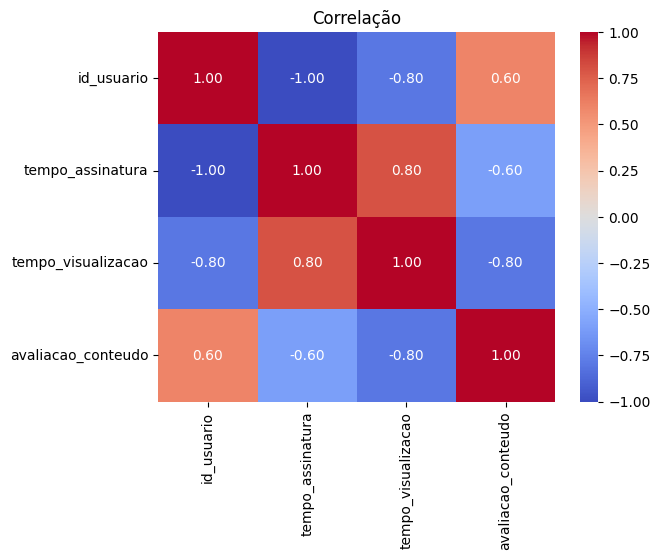

In [44]:
sns.heatmap(correlacao.corr("spearman"), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlação")
plt.show()

# Nenhuma das variáveis numéricas apresentaram uma correlação positiva além da correlação entre a própria variável.

/var/folders/0v/z6xtck4j4td172mjrrscm05w0000gn/T/ipykernel_28830/963687422.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(


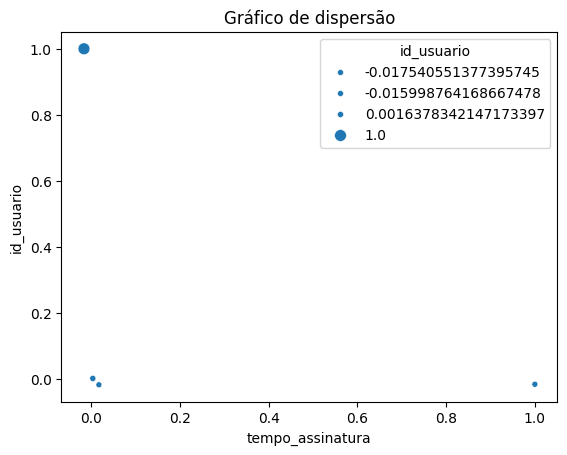

In [43]:
sns.scatterplot(
    data=variaveis_numericas.corr(method='spearman'),
    x='tempo_assinatura',
    y='id_usuario',
    size='id_usuario',
    palette='deep'
)
plt.title("Gráfico de dispersão")
plt.show()

# De fato as variáveis númericas são independentes, e uma não afeta o comportamento da outra